<a href="https://colab.research.google.com/github/Amitkumardas123/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Iris Flower Classification

##### **Contribution**    - Individual
##### **Name**            - Amit Kumar Das

# **Project Summary -**

**Project Description:**

The Iris Flower Classification project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements. Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

**Objective:**

The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. The model aims to automate the classification process, offering a practical solution for identifying iris species.

**Key Project Details:**

Iris flowers have three species: setosa, versicolor, and virginica.
These species can be distinguished based on measurements such as sepal length, sepal width, petal length, and petal width.
The project involves training a machine learning model on a dataset that contains iris flower measurements associated with their respective species.
The trained model will classify iris flowers into one of the three species based on their measurements.

# **Problem Statement:**

The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

**Objective:**

The objective of this project is to develop a machine learning model capable of learning from the measurements of iris flowers and accurately classifying them into their respective species. The model's primary goal is to automate the classification process based on the distinct characteristics of each iris species.

**Project Details:**

***Iris Species:***

The dataset consists of iris flowers, specifically from the species setosa, versicolor, and virginica.

***Key Measurements:***

The essential characteristics used for classification include sepal length, sepal width, petal length, and petal width.

***Machine Learning Model:***

 The project involves the creation and training of a machine learning model to accurately classify iris flowers based on their measurements.

This project's significance lies in its potential to streamline and automate the classification of iris species, which can have broader applications in botany, horticulture, and environmental monitoring.

# **GitHub Link -**

https://github.com/Amitkumardas123/Iris-Flower-Classification

# **Let's Begin !**

# **Import Libraries**

In [1]:
# Import Libraries

# libraries that are used for data read,analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Import model selection libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# libraries used to implement models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# libraries to evaluate performance
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Dataset Loading**

In [2]:
# Load Dataset
Data = pd.read_csv("/content/drive/MyDrive/Unified mentor projects/MY PROJECT/Iris Classification/Iris Dataset.csv")

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Dataset Rows & Columns count**

In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",Data.shape[0])
print("Number of columns are: ",Data.shape[1])

Number of rows are:  150
Number of columns are:  5


# **Dataset Information**

In [5]:
# Dataset Info
# Checking information about the dataset using info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Describe  the  features of datase
Data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Duplicate Values**

In [7]:
# Dataset Duplicate Value Count
dup = len(Data[Data.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 3


In [8]:
# Remove Duplicate Value in Dataset
Data.drop_duplicates(inplace = True)

In [9]:
# Again Count Dataset Duplicate Value
dup = len(Data[Data.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 0


# **Missing Values/Null Values**

In [10]:
# Missing Values/Null Values Count
Data.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# **Distribution of independent features.**

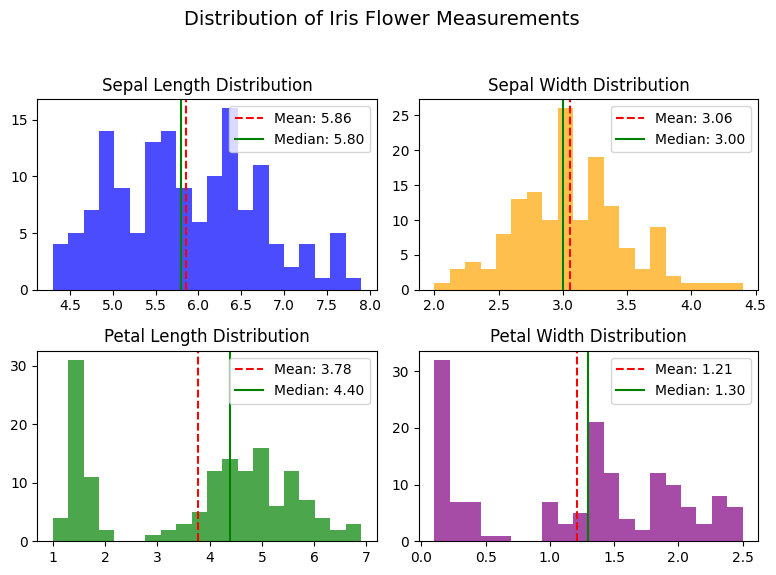

In [11]:
import matplotlib.pyplot as plt

# Calculate mean and median for each feature
mean_sepal_length = Data['SepalLengthCm'].mean()
median_sepal_length = Data['SepalLengthCm'].median()

mean_sepal_width = Data['SepalWidthCm'].mean()
median_sepal_width = Data['SepalWidthCm'].median()

mean_petal_length = Data['PetalLengthCm'].mean()
median_petal_length = Data['PetalLengthCm'].median()

mean_petal_width = Data['PetalWidthCm'].mean()
median_petal_width = Data['PetalWidthCm'].median()

# Create a figure and set the title
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Subplot 1 (Sepal Length Distribution)
plt.subplot(2, 2, 1)
plt.hist(Data['SepalLengthCm'], bins=20, alpha=0.7, color='blue')
plt.axvline(mean_sepal_length, color='r', linestyle='--', label=f'Mean: {mean_sepal_length:.2f}')
plt.axvline(median_sepal_length, color='g', linestyle='-', label=f'Median: {median_sepal_length:.2f}')
plt.title('Sepal Length Distribution')
plt.legend()

# Subplot 2 (Sepal Width Distribution)
plt.subplot(2, 2, 2)
plt.hist(Data['SepalWidthCm'], bins=20, alpha=0.7, color='orange')
plt.axvline(mean_sepal_width, color='r', linestyle='--', label=f'Mean: {mean_sepal_width:.2f}')
plt.axvline(median_sepal_width, color='g', linestyle='-', label=f'Median: {median_sepal_width:.2f}')
plt.title('Sepal Width Distribution')
plt.legend()

# Subplot 3 (Petal Length Distribution)
plt.subplot(2, 2, 3)
plt.hist(Data['PetalLengthCm'], bins=20, alpha=0.7, color='green')
plt.axvline(mean_petal_length, color='r', linestyle='--', label=f'Mean: {mean_petal_length:.2f}')
plt.axvline(median_petal_length, color='g', linestyle='-', label=f'Median: {median_petal_length:.2f}')
plt.title('Petal Length Distribution')
plt.legend()

# Subplot 4 (Petal Width Distribution)
plt.subplot(2, 2, 4)
plt.hist(Data['PetalWidthCm'], bins=20, alpha=0.7, color='purple')
plt.axvline(mean_petal_width, color='r', linestyle='--', label=f'Mean: {mean_petal_width:.2f}')
plt.axvline(median_petal_width, color='g', linestyle='-', label=f'Median: {median_petal_width:.2f}')
plt.title('Petal Width Distribution')
plt.legend()

# Adjust the layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leaves space for the suptitle
plt.show()


# **Sepal Length vs Sepal Width**

In [12]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

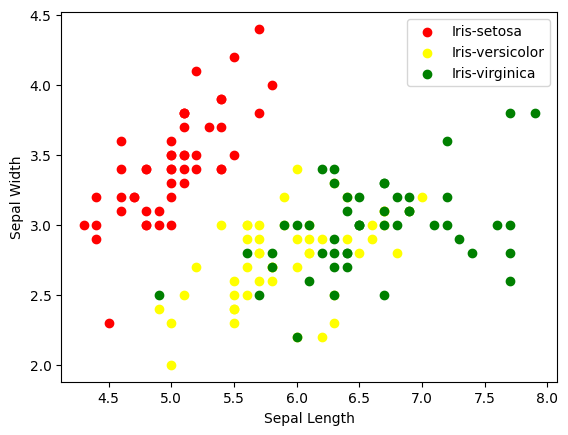

In [13]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = Data[Data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()


# **Petal Length vs Petal Width**

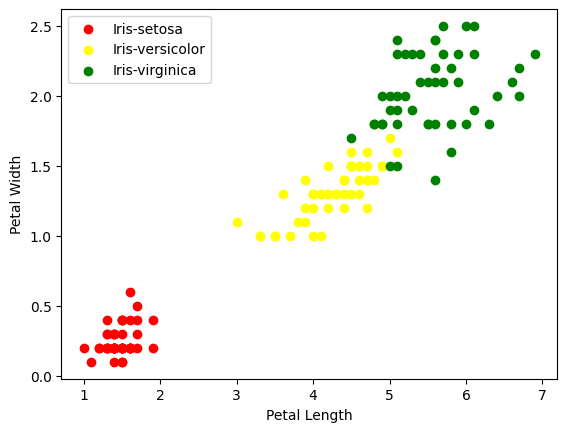

In [14]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = Data[Data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# **Sepal Length vs Petal Length**

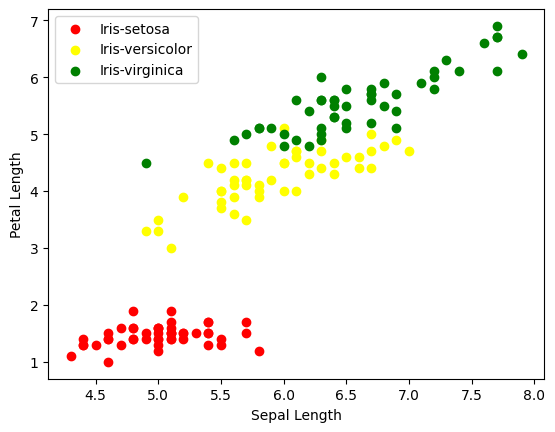

In [15]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = Data[Data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# **Sepal Width vs Petal Width**

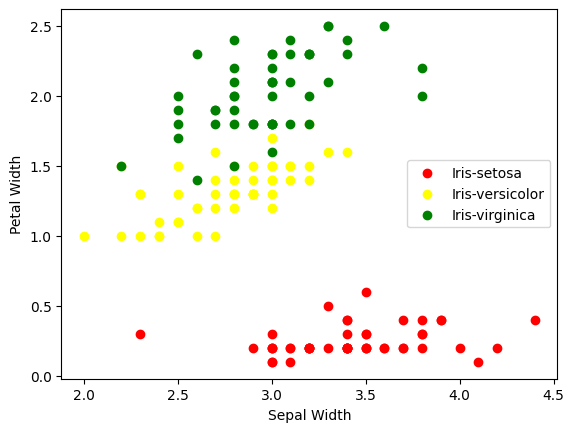

In [16]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = Data[Data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# **Correlation Heatmap**

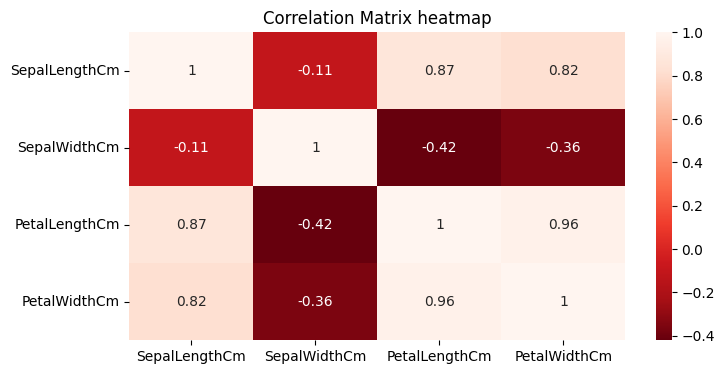

In [17]:
# Drop the last column
data = Data.iloc[:, :-1]

# Alternatively, using .drop() if you know the column name
# Data = Data.drop(columns=['your_categorical_column_name'])

# Correlation Heatmap Visualization Code
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()


# **Feature Engineering & Data Pre-processing**

# **Categorical Encoding**

In [18]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
Data['Species'] = le.fit_transform(Data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = Data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


# **Data Splitting**

In [19]:
# Defining the X and y
x=Data.drop(columns=['Species'], axis=1)
y=Data['Species']

In [20]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [21]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
Species,
1,36
2,36
0,30


# **ML Model Implementation**

In [22]:
#Create a function to evaluate teh model

# empty list for appending performance metric score
model_result = []

# Modify the predict function to handle multiclass targets
def predict(ml_model, model_name):

  '''
  This function uses to Pass the model and predict value for different models.
  Function will calculate all the evaluation metrics and append those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  '''

  # model fitting
  model = ml_model.fit(x_train, y_train)

  # predicting value and probability
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # For ROC curve, check if the classifier supports predict_proba
  if hasattr(model, "predict_proba"):
      y_train_prob = model.predict_proba(x_train)[:, 1]
      y_test_prob = model.predict_proba(x_test)[:, 1]

  ''' Performance Metrics '''
  # accuracy score
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score
  train_precision = precision_score(y_train, y_train_pred, average='weighted')  # Changed average
  test_precision = precision_score(y_test, y_test_pred, average='weighted')      # Changed average
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score
  train_recall = recall_score(y_train, y_train_pred, average='weighted')         # Changed average
  test_recall = recall_score(y_test, y_test_pred, average='weighted')            # Changed average
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')

  # f1 score
  train_f1 = f1_score(y_train, y_train_pred, average='weighted')                 # Changed average
  test_f1 = f1_score(y_test, y_test_pred, average='weighted')                    # Changed average
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')

  # roc_auc score (can only be calculated if the model supports predict_proba)
  if hasattr(model, "predict_proba"):
      train_roc_auc = roc_auc_score(y_train, model.predict_proba(x_train), multi_class='ovr')
      test_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
      print(f'train roc_auc : {round(train_roc_auc,3)}')
      print(f'test roc_auc : {round(test_roc_auc,3)}')

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)

  # Confusion Matrix
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('Confusion Matrix on Test Data', weight='bold')
  plt.show()

  ''' Model performance '''
  model_result.append({
      'model': model_name,
      'train_accuracy': train_accuracy,
      'test_accuracy': test_accuracy,
      'train_precision': train_precision,
      'test_precision': test_precision,
      'train_recall': train_recall,
      'test_recall': test_recall,
      'train_f1': train_f1,
      'test_f1': test_f1
  })

# **Logistic Regression**

train accuracy : 0.98
test accuracy : 1.0
train precision : 0.981
test precision : 1.0
train recall : 0.98
test recall : 1.0
train f1 : 0.98
test f1 : 1.0
train roc_auc : 0.997
test roc_auc : 1.0
classification report for test data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------------------------------------


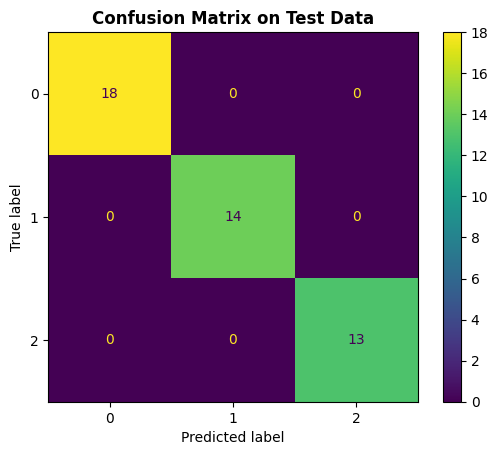

In [23]:
# fit the model
predict(LogisticRegression(), 'LogisticRegression')

# **DecisionTree Clasifier**

In [24]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}


In [25]:
# Select the best hyperparameters
optimal_model = grid_search.best_params_
optimal_model

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}

In [26]:
model = DecisionTreeClassifier(max_depth= 3,
                               min_samples_leaf= 18,
                               min_samples_split= 2,
                               random_state=20
                               )

train accuracy : 0.951
test accuracy : 0.978
train precision : 0.953
test precision : 0.979
train recall : 0.951
test recall : 0.978
train f1 : 0.951
test f1 : 0.978
train roc_auc : 0.986
test roc_auc : 0.996
classification report for test data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

--------------------------------------------------------------------------------


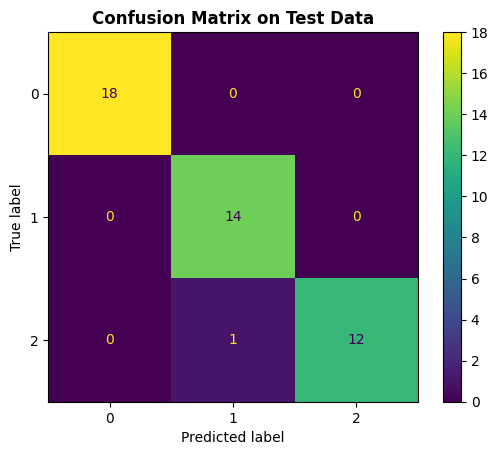

In [27]:
# Evaluate the model
predict(model, 'DecisionTree')

# **RandomForestClassifier**

In [28]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=0),
                   estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10, 11, 12, 13, 14,
                                                      15],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 50, 100, 200]})

In [29]:
optimal_model = random_search.best_estimator_
optimal_model

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=0)

train accuracy : 1.0
test accuracy : 0.978
train precision : 1.0
test precision : 0.979
train recall : 1.0
test recall : 0.978
train f1 : 1.0
test f1 : 0.978
train roc_auc : 1.0
test roc_auc : 1.0
classification report for test data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

--------------------------------------------------------------------------------


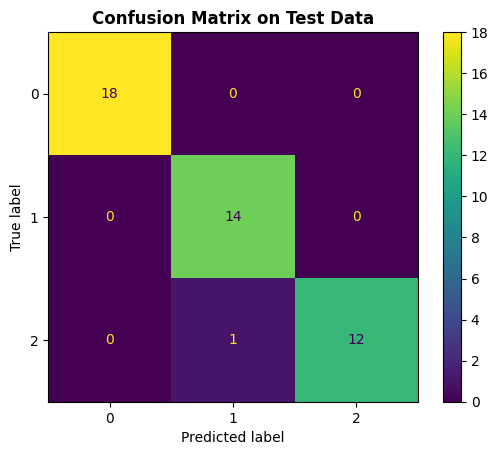

In [30]:
# Evaluate the model
predict(optimal_model, 'RandomForest')

# **Support Vector Machine (SVM)**

In [31]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=0),
                   estimator=SVC(probability=True, random_state=0), n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                                        'degree': array([2, 3, 4, 5]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [32]:
best_SVC_model= random_search.best_estimator_
best_SVC_model

SVC(C=3.8000000000000003, degree=4, kernel='linear', probability=True,
    random_state=0)

train accuracy : 0.971
test accuracy : 1.0
train precision : 0.973
test precision : 1.0
train recall : 0.971
test recall : 1.0
train f1 : 0.971
test f1 : 1.0
train roc_auc : 0.999
test roc_auc : 1.0
classification report for test data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------------------------------------


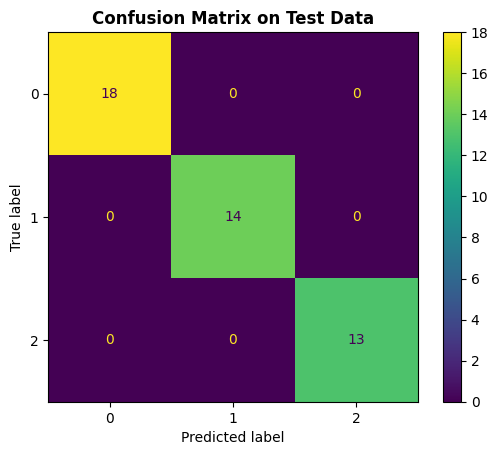

In [33]:
# Evaluate the model
predict(best_SVC_model, 'SVC')

# **Xtreme Gradient Boosting**

In [34]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb = XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=0),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           im...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])})

In [35]:
# Find optimal model for which our model gives us the best result

best_xgb_model= random_search.best_params_
best_xgb_model

{'n_estimators': 190, 'max_depth': 8, 'learning_rate': 0.16}

In [36]:
model = XGBClassifier(n_estimators=120,
                      max_depth=11,
                      learning_rate=0.01
                      )

train accuracy : 0.961
test accuracy : 1.0
train precision : 0.962
test precision : 1.0
train recall : 0.961
test recall : 1.0
train f1 : 0.961
test f1 : 1.0
train roc_auc : 0.997
test roc_auc : 1.0
classification report for test data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------------------------------------


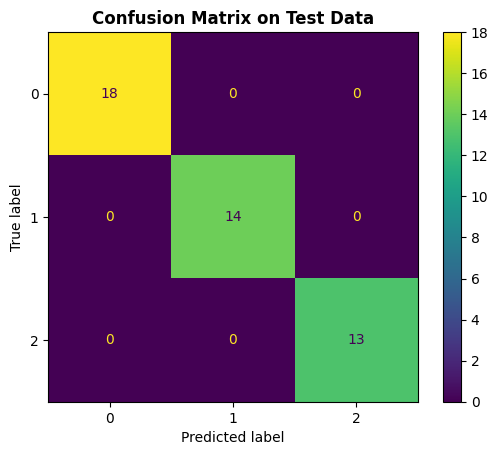

In [37]:
# Evaluate the model
predict(model, 'XGboost_model')

# **Naive Bayes**

In [38]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=4, random_state=0),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.579332...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [39]:
# Find optimal model for which our model gives us the best result

best_NB_Model = GridSearch.best_params_
best_NB_Model

{'var_smoothing': 0.002848035868435802}

In [40]:
Model = GaussianNB(var_smoothing = 0.008111308307896872)

train accuracy : 0.951
test accuracy : 0.978
train precision : 0.951
test precision : 0.979
train recall : 0.951
test recall : 0.978
train f1 : 0.951
test f1 : 0.978
train roc_auc : 0.992
test roc_auc : 1.0
classification report for test data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

--------------------------------------------------------------------------------


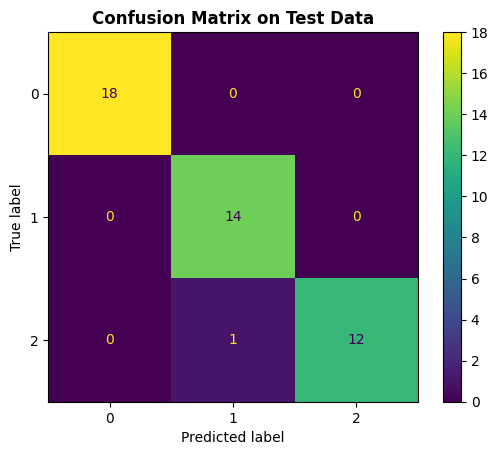

In [41]:
# Evaluate the model
predict(Model, 'Naive_Bayes')

# **Neural Network**

In [42]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=0),
                   estimator=MLPClassifier(random_state=0), n_jobs=-1,
                   param_distributions={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026...
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099]),
                                        'hidden_layer_sizes': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [43]:
# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'hidden_layer_sizes': 60, 'alpha': 0.0096}

In [44]:
Model = MLPClassifier(hidden_layer_sizes =90, alpha=0.0011)

train accuracy : 0.961
test accuracy : 1.0
train precision : 0.965
test precision : 1.0
train recall : 0.961
test recall : 1.0
train f1 : 0.961
test f1 : 1.0
train roc_auc : 0.996
test roc_auc : 1.0
classification report for test data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------------------------------------


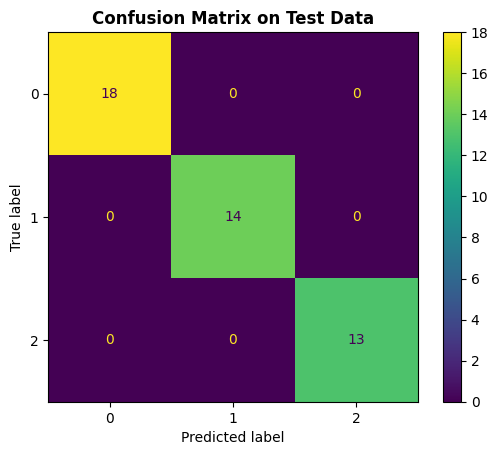

In [45]:
# Evaluate the model
predict(Model, 'Neural_Network')

# **Model Result and Conclusion**

In [46]:
model_result = pd.DataFrame(model_result)
round(model_result,2)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogisticRegression,0.98,1.00,0.98,1.00,0.98,1.00,0.98,1.00
1,DecisionTree,0.95,0.98,0.95,0.98,0.95,0.98,0.95,0.98
2,RandomForest,1.00,0.98,1.00,0.98,1.00,0.98,1.00,0.98
3,SVC,0.97,1.00,0.97,1.00,0.97,1.00,0.97,1.00
4,XGboost_model,0.96,1.00,0.96,1.00,0.96,1.00,0.96,1.00
5,Naive_Bayes,0.95,0.98,0.95,0.98,0.95,0.98,0.95,0.98
6,Neural_Network,0.96,1.00,0.96,1.00,0.96,1.00,0.96,1.00


After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall & F1 score as the primary evaluation metric for our Iris flower classification model. This means that our goal is to maximize the number of true positives (correctly identified the different iris flowers) while minimizing the number of false negatives (incorrectly identified the flowers not a iris flower). By doing so, we aim to ensure that we correctly identify as many different iris flowers, even if it means that we may have some false positives.

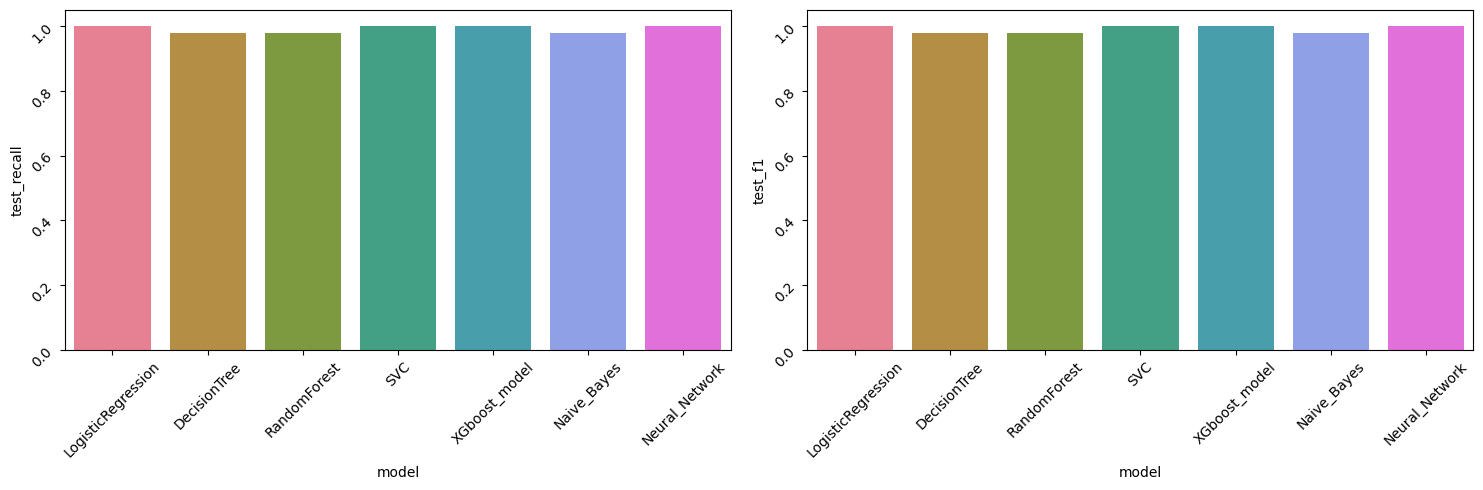

In [47]:
# plotting graph to compaire model performance of all the models

# Visualizing evaluation Metric Score chart

fig, ax = plt.subplots(1,2, figsize=(15,5))
# Create a colorful palette
colors = sns.color_palette("husl", len(model_result['model']))

sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=ax[0],palette=colors)           # Model Vs test R2
ax[0].tick_params(rotation=45)
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=ax[1],palette=colors)       # Model Vs test Adj R2
ax[1].tick_params(rotation=45)
plt.tight_layout()

After evaluating the performance of several machine learning models on the Iris dataset, I have selected the Logistic Regression,SVC,MLPC Classifier,XgbClassifier as our final prediction model. This decision was based on the model’s performance on our primary evaluation metric of recall, which measures the ability of the model to correctly identify different iris flowers. In our analysis, we found that the Logistic Regression had the highest recall score among the models we evaluated.

I choose recall as the primary evaluation metric because correctly identifying different iris flowers are critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify as many different iris flowers as possible, even if it means that we may have some false positives. Overall, we believe that the Logistic Regression is the best choice for our needs and will help us achieve a positive business impact.

# **Conclusion**

In the Iris flower classification project, the Logistic Regression model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

**Data Exploration:** Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

**Data Preprocessing:** Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

**Model Selection:** After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

**Model Training and Evaluation:** The Logistic Regression model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

Challenges and Future Work: The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

Practical Application: The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Logistic Regression as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.